# Data Preprocessing

In [1]:
import os
from pathlib import Path 
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
p = Path("dataset(dog-cat-horse-human)/")
dirs = p.glob("*")

labels_dict ={ "cat":0 , "dog":1 , "horse":2 , "human":3}
labels =[]
image_data =[]

for folder_name in dirs:
    #print(folder_name)
    label = str(folder_name).split("\\")[-1][:-1]
    print(label)
    
    for img_path in folder_name.glob("*.jpg"):
        #print(img_path)
        img = image.load_img(img_path,target_size = (32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        
print(len(image_data))
print(len(labels))   

cat
dog
horse
human
808
808


In [3]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [4]:
#convert image_data & labels to numpy array
image_data = np.array(image_data,dtype ='uint8')
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


# Randomly shuffle our data

In [5]:
import random

In [6]:
combined = list(zip(image_data,labels))
random.shuffle(combined)

#unzip the data
image_data[:],labels[:]=zip(*combined)

# Visualize the prepared data

In [7]:
import matplotlib.pyplot as plt

In [8]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

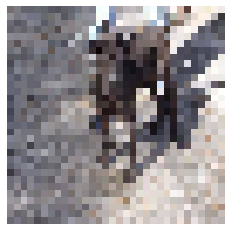

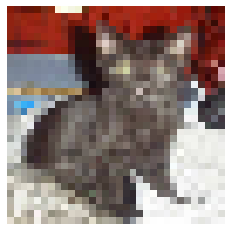

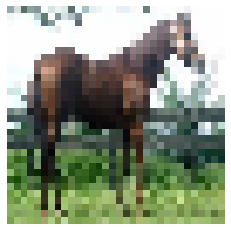

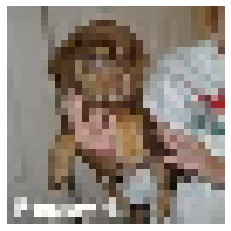

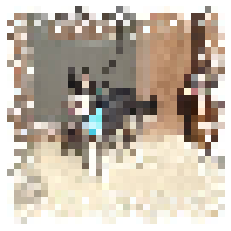

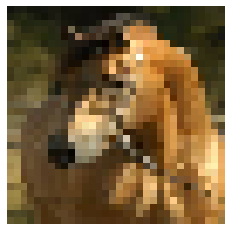

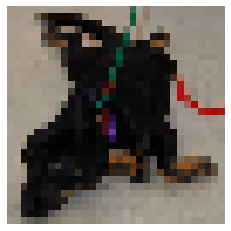

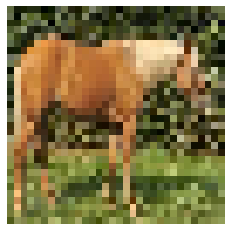

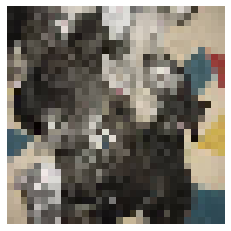

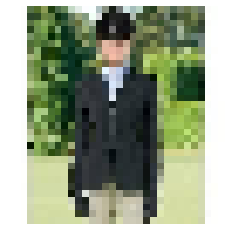

In [9]:
for i in range(10):
    drawImg(image_data[i])

# SVM Classifier

In [86]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        
        loss += 0.5*np.dot(W.T,W)[0][0]
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(X[i].reshape(1,-1),W)+b)
            ti = ti[0]
            loss += self.C*max(0,(1-ti))
        
        return loss
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=200):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((no_of_features,1))
        bias = 0.0
        
        losses = []
        
        for i in range(maxItr):
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            
            #Mini Batch
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                #Gradients wrt w and b
                gradw = 0
                gradb = 0
                
                #Summation over Batch Gradient
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        idx = ids[j]
                        ti = Y[idx]*(np.dot(X[idx].reshape(1,-1),W)+bias)[0]
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[idx]*X[idx].reshape(1,-1).T
                            gradb += c*Y[idx]
                    
                #Gradient Weight Update after each mini-batch
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses

# We need to convert data for One-For-One Classification

In [79]:
m = image_data.shape[0]
image_data = image_data.reshape((m,-1))
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [80]:
classes = len(np.unique(labels))
print(classes)

4


In [81]:
def classWiseData(x,y):
    data = {}
    
    for i in range(classes):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for i in data.keys():
        data[i] = np.array(data[i])
        
    return data

In [82]:
data = classWiseData(image_data,labels)

In [83]:
for i in range(classes):
    print(data[i].shape[0])
    print(data[i].shape)
    

202
(202, 3072)
202
(202, 3072)
202
(202, 3072)
202
(202, 3072)


In [84]:
def getDataPairForSVM(d1,d2):
    
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    
    samples = l1 + l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels
    

# Training NC2 SVMs Part

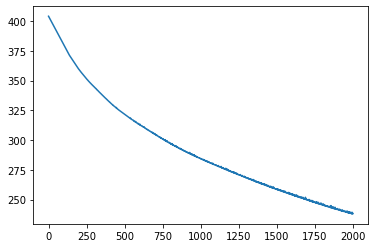

In [87]:
mySVM = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate=0.00000000006,maxItr=2000)
plt.plot(loss)
plt.show()

In [56]:
def trainSVMs(x,y):
    svm_classifier = {}
    
    for i in range(classes):
        svm_classifier[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = getDataForSVM(data[i],data[j])
            wts,bias,loss = mySVM.fit(xpair,ypair,learning_rate=0.00000000006,maxItr=2000)
            svm_classifier[i][j] = (wts,bias)
            plt.plot(loss)
            plt.show()
        
    return svm_classifier

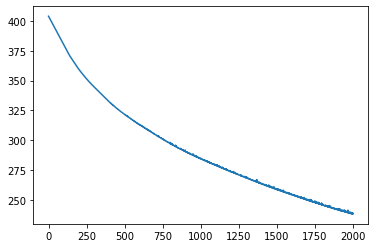

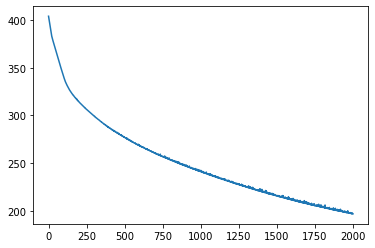

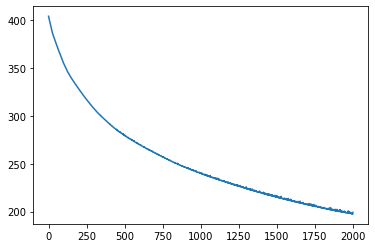

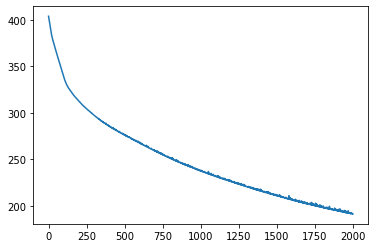

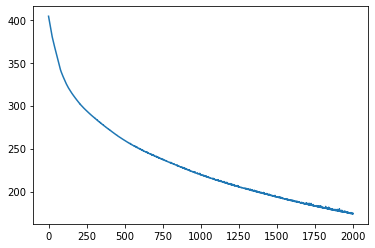

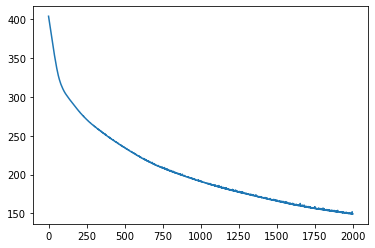

In [88]:
svm_classifier = trainSVMs(image_data,labels)

In [89]:
#Parameters we get after training
cats_dogs = svm_classifier[0][1]
print(cats_dogs[0].shape)
print(cats_dogs[1])



(3072, 1)
-1.9512000000000025e-07


In [90]:
 def binaryPredict(x,w,b):
        z = np.dot(x,w) + b
        if z>0:
            z =1
        else:
            z = -1
        return z

In [91]:
def predict(x):
    count = np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifier[i][j]
            z = binaryPredict(x,w,b)
            
            if z ==1:
                count[j] +=1
            else:
                count[i] +=1
    #print(count)
    final_pred = np.argmax(count)
    return final_pred

In [92]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        pred = predict(x[i])
        if pred == y[i]:
            count += 1
    return count/x.shape[0]

In [93]:
accuracy(image_data,labels)

0.5829207920792079

In [94]:
from sklearn import svm

In [96]:
svm_classifier2 =svm.SVC(kernel = 'linear' ,C = 1.0)
svm_classifier2.fit(image_data,labels)
svm_classifier2.score(image_data,labels)

0.6485148514851485